In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from xbbg import blp

%matplotlib inline



In [2]:
def hist_data(tickers, start_date, end_date, condition):
    # Return a matrix of prices, with modifiable pricing condition
    data = blp.bdh(tickers, condition, start_date,end_date)
    data = data.dropna()
    return data

In [3]:
def log_sum_return(data, title):
    data = data.apply(lambda x : np.log(x))
    data = data.dropna()
    data = data.diff()
    data = data.dropna()
    data = data.cumsum()
    data = data*100
    plt.figure(figsize = (16,16))
    sns.lineplot(data = data, palette = "bright")
    sns.set(style='white')
    plt.title(title + ", %s to %s" % (data.index[0], data.index[-1]))
    plt.ylabel("Log Return")
    plt.xlabel("Date")
    x_range = np.arange(data.index[0], data.index[-1]+relativedelta(days=1), 10)
    plt.xticks(x_range)
    plt.xticks(rotation=45)
    maximum = abs(data).max().max()
    digits = len(str(maximum.round(0)))-3
    scale_size = np.ceil(maximum/(10**digits))*(10**digits)
    y_range = np.arange(-1*scale_size, scale_size+scale_size/10, scale_size/10)
    plt.yticks(y_range)
    return data

In [4]:
G10 = ["TWI EUSP INDEX", "TWI SFSP INDEX", "TWI BPSP INDEX", "TWI NKSP INDEX", "TWI SKSP INDEX",
      "TWI CDSP INDEX", "TWI ADSP INDEX", "TWI NDSP INDEX", "TWI JPSP INDEX", "TWI USSP INDEX"]

In [5]:
df = hist_data(G10, "2021-12-31", datetime.date.today(), "LAST PRICE")

           TWI EUSP INDEX TWI SFSP INDEX TWI BPSP INDEX TWI NKSP INDEX  \
               LAST PRICE     LAST PRICE     LAST PRICE     LAST PRICE   
2022-01-03      -0.348375      -0.269179       0.105097      -0.069212   
2022-01-04      -0.489729       0.085198       0.550532       0.046115   
2022-01-05      -0.290228      -0.144348       0.576673       0.034588   
2022-01-06      -0.381617      -0.381003       0.537460      -0.265574   
2022-01-07      -0.033126      -0.829552       0.498231      -0.184672   
...                   ...            ...            ...            ...   
2022-06-24      -0.473089       1.922137      -3.681562      -3.032132   
2022-06-27      -0.215517       1.844927      -3.872662      -2.711714   
2022-06-28      -0.531342       2.313703      -3.954674      -2.534146   
2022-06-29      -0.990231       3.041397      -3.982026      -2.770973   
2022-06-30      -0.898284       2.920481      -3.845339      -2.250693   

           TWI SKSP INDEX TWI CDSP IN

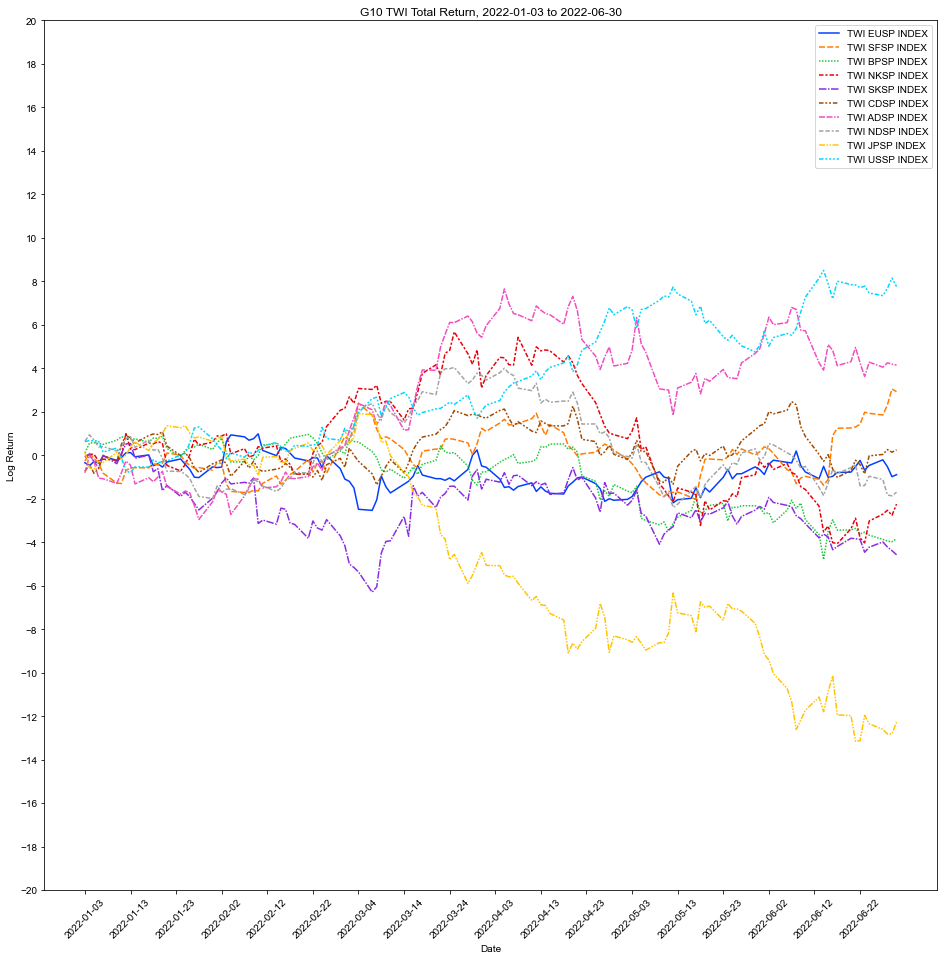

In [6]:
print(log_sum_return(df, "G10 TWI Total Return"))

In [7]:
EM = ["USDBRL CURNCY", "USDMXN CURNCY", "USDCOP CURNCY", "USDCLP CURNCY",
     "USDZAR CURNCY", "USDTRY CURNCY", "USDILS CURNCY", "USDPLN CURNCY", "USDCZK CURNCY", "USDHUF CURNCY",
     "USDCNH CURNCY", "USDKRW CURNCY", "USDSGD CURNCY", "USDTHB CURNCY", "USDINR CURNCY",
     "USDIDR CURNCY", "USDTWD CURNCY", "USDPHP CURNCY"]


In [8]:
em_df = hist_data(EM, "2021-12-31", datetime.date.today(), "LAST PRICE")


           USDBRL CURNCY USDMXN CURNCY USDCOP CURNCY USDCLP CURNCY  \
              LAST PRICE    LAST PRICE    LAST PRICE    LAST PRICE   
2022-01-05      0.542045      0.252643     -1.411341     -1.210654   
2022-01-06      0.007036     -0.060456     -1.195390     -1.232151   
2022-01-07     -0.901114     -0.568953     -0.749331     -2.264635   
2022-01-10     -0.265955     -0.717098     -0.727117     -1.391131   
2022-01-11     -1.993280     -0.659678     -2.187138     -2.240502   
...                  ...           ...           ...           ...   
2022-06-23     -8.154481     -2.472198      0.655197      6.518128   
2022-06-24     -8.102967     -3.211337      1.382759      8.029768   
2022-06-28     -7.608265     -1.907247      0.371960      7.286677   
2022-06-29     -9.267522     -1.907247      0.831996      8.716572   
2022-06-30     -8.565630     -2.042465      1.786208      8.138582   

           USDZAR CURNCY USDTRY CURNCY USDILS CURNCY USDPLN CURNCY  \
              LAST 

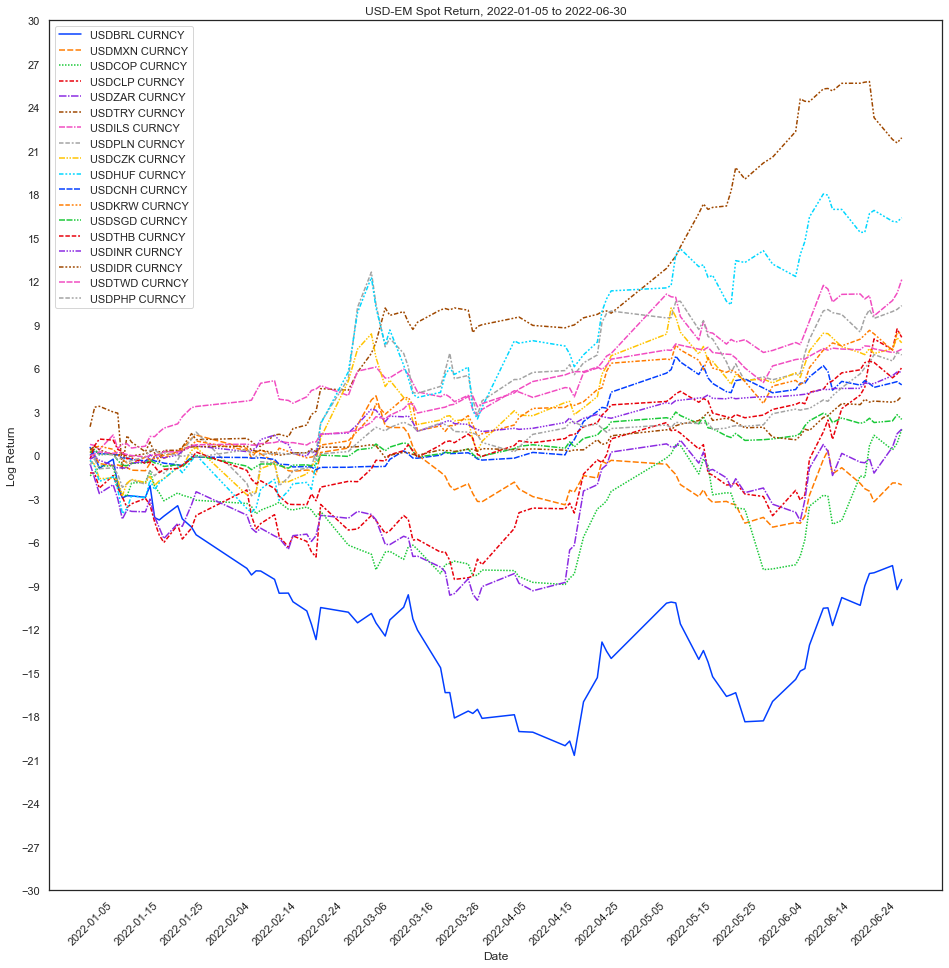

In [9]:
print(log_sum_return(em_df, "USD-EM Spot Return"))

In [10]:
def em_fwd_return(ccy, conv, lookback):
    current_spot = blp.bdp(ccy, "LAST_PRICE")
    try:
        past_fwd = hist_data(tickers = conv, start_date = lookback,
                         end_date = lookback, condition = "LAST PRICE")
        ln_return = np.log(current_spot.iloc[0].values)-np.log(past_fwd.iloc[0].values) 
        title = ccy+"-"+conv+" "+str(past_fwd.index[0])+' to '+str(datetime.date.today())
        frame = pd.DataFrame({title:ln_return})
        frame.index = [datetime.date.today()]
        return frame
    except: 
        return None
    

In [11]:
print(em_fwd_return("USDMXN Curncy", "MXN+6M CURNCY", datetime.date.today()-relativedelta(months = 6)))

            USDMXN Curncy-MXN+6M CURNCY 2021-12-30 to 2022-06-30
2022-06-30                                          -0.053079   


,ARKK US EQUITY,GME US EQUITY,AMC US EQUITY,TSLA US EQUITY
,LAST PRICE,LAST PRICE,LAST PRICE,LAST PRICE
2022-01-03,2.505612,2.954768,-2.531781,12.691166
2022-01-04,-2.029117,0.349815,-6.493075,8.417881
2022-01-05,-9.381009,-13.716743,-17.865183,2.922489
2022-01-06,-10.010015,-12.441764,-19.148102,0.746652
2022-01-07,-11.374742,-5.378273,-16.815763,-2.862357
...,...,...,...,...
2022-06-24,-72.461286,-9.301482,-77.989121,-36.023113
2022-06-27,-74.734362,-13.469696,-65.491678,-36.343791
2022-06-28,-80.784269,-17.650255,-70.945592,-41.477705


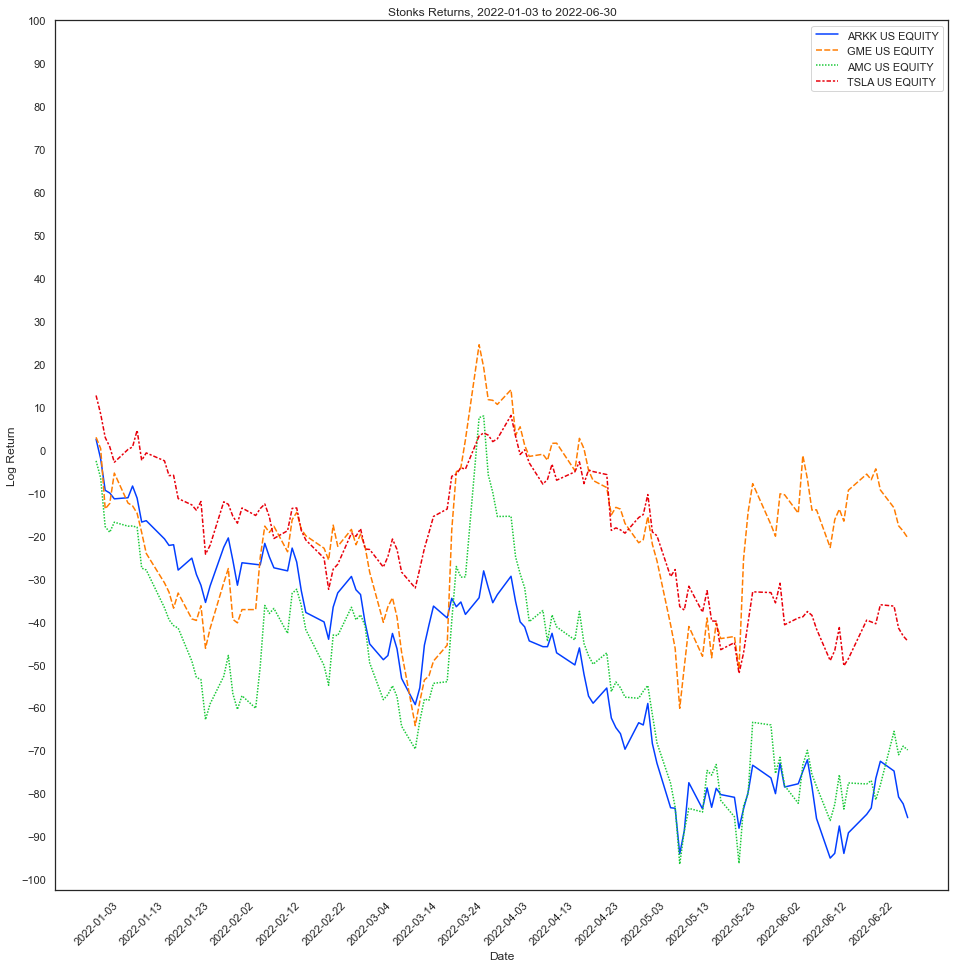

In [12]:
stocks = ["ARKK US EQUITY", "GME US EQUITY", "AMC US EQUITY", "TSLA US EQUITY"]
stock_df = hist_data(stocks, "2021-12-31", datetime.date.today(), "LAST PRICE")
log_sum_return(stock_df, "Stonks Returns")

In [523]:
EM_conv = ["BCN+6M CURNCY", "MXN+6M CURNCY", "CLN+6M CURNCY", "CHN+6M CURNCY",
          "ZAR+6M CURNCY", "TRY+6M CURNCY", "ILS+6M CURNCY", "PLN+6M CURNCY", "CZK+6M CURNCY", "HUF+6M CURNCY",
          "CNH+6M CURNCY", "KWN+6M CURNCY", "SGD+6M CURNCY", "THB+6M CURNCY", "IRN+6M CURNCY",
          "IHN+6M CURNCY", "NTN+6M CURNCY", "PPN+6M CURNCY"]

In [524]:
lookback = datetime.date.today()-relativedelta(months = 6)
for i in range(0, len(EM)):
    print(em_fwd_return(EM[i], EM_conv[i], lookback))

            USDBRL CURNCY-BCN+6M CURNCY 2021-12-21 to 2022-06-21
2022-06-21                                          -0.160224   
            USDMXN CURNCY-MXN+6M CURNCY 2021-12-21 to 2022-06-21
2022-06-21                                          -0.065978   
            USDCOP CURNCY-CLN+6M CURNCY 2021-12-21 to 2022-06-21
2022-06-21                                          -0.018449   
            USDCLP CURNCY-CHN+6M CURNCY 2021-12-21 to 2022-06-21
2022-06-21                                          -0.011746   
            USDZAR CURNCY-ZAR+6M CURNCY 2021-12-21 to 2022-06-21
2022-06-21                                          -0.022716   
None
None
None
None
None
            USDCNH CURNCY-CNH+6M CURNCY 2021-12-21 to 2022-06-21
2022-06-21                                           0.035122   
            USDKRW CURNCY-KWN+6M CURNCY 2021-12-21 to 2022-06-21
2022-06-21                                           0.079573   
            USDSGD CURNCY-SGD+6M CURNCY 2021-12-21 to 2022-06-21
